In [33]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [34]:
distance_to_obstacle = ctrl.Antecedent(np.arange(0, 101, 1), 'distance_to_obstacle')
angle_to_obstacle = ctrl.Antecedent(np.arange(-180, 181, 1), 'angle_to_obstacle')

speed_change = ctrl.Consequent(np.arange(-100, 101, 1), 'speed_change')
heading_change = ctrl.Consequent(np.arange(-45, 46, 1), 'heading_change')

In [35]:
distance_to_obstacle['close'] = fuzz.trimf(distance_to_obstacle.universe, [0, 0, 30])
distance_to_obstacle['medium'] = fuzz.trimf(distance_to_obstacle.universe, [20, 50, 80])
distance_to_obstacle['far'] = fuzz.trimf(distance_to_obstacle.universe, [50, 100, 100])
distance_to_obstacle['very_far'] = fuzz.trimf(distance_to_obstacle.universe, [80, 100, 100])

angle_to_obstacle['neg_big'] = fuzz.trimf(angle_to_obstacle.universe, [-180, -180, -120])
angle_to_obstacle['neg_med'] = fuzz.trimf(angle_to_obstacle.universe, [-120, -90, -30])
angle_to_obstacle['neg_small'] = fuzz.trimf(angle_to_obstacle.universe, [-30, -10, 0])
angle_to_obstacle['pos_small'] = fuzz.trimf(angle_to_obstacle.universe, [0, 10, 30])
angle_to_obstacle['pos_med'] = fuzz.trimf(angle_to_obstacle.universe, [30, 90, 120])
angle_to_obstacle['pos_big'] = fuzz.trimf(angle_to_obstacle.universe, [120, 180, 180])

speed_change['very_slow'] = fuzz.trimf(speed_change.universe, [-100, -100, -50])
speed_change['slow'] = fuzz.trimf(speed_change.universe, [-50, 0, 50])
speed_change['fast'] = fuzz.trimf(speed_change.universe, [50, 100, 100])
speed_change['very_fast'] = fuzz.trimf(speed_change.universe, [75, 100, 100])

heading_change['neg_big'] = fuzz.trimf(heading_change.universe, [-45, -45, -15])
heading_change['neg_med'] = fuzz.trimf(heading_change.universe, [-15, -10, 0])
heading_change['neg_small'] = fuzz.trimf(heading_change.universe, [-5, 0, 0])
heading_change['zero'] = fuzz.trimf(heading_change.universe, [-1, 0, 1])
heading_change['pos_small'] = fuzz.trimf(heading_change.universe, [0, 5, 15])
heading_change['pos_med'] = fuzz.trimf(heading_change.universe, [10, 15, 45])
heading_change['pos_big'] = fuzz.trimf(heading_change.universe, [15, 45, 45])


In [36]:
rule11 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['pos_med'], 
                   (speed_change['very_fast'], heading_change['zero']))
rule12 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['pos_small'], 
                   (speed_change['fast'], heading_change['neg_small']))
rule13 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['neg_small'], 
                   (speed_change['fast'], heading_change['pos_small']))
rule14 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['neg_med'], 
                   (speed_change['very_fast'], heading_change['zero']))
rule15 = ctrl.Rule(distance_to_obstacle['medium'] & angle_to_obstacle['pos_big'], 
                   (speed_change['fast'], heading_change['zero']))

rule16 = ctrl.Rule(distance_to_obstacle['medium'] & angle_to_obstacle['pos_med'], 
                   (speed_change['slow'], heading_change['neg_small']))
rule17 = ctrl.Rule(distance_to_obstacle['medium'] & angle_to_obstacle['pos_small'], 
                   (speed_change['slow'], heading_change['neg_med']))
rule18 = ctrl.Rule(distance_to_obstacle['medium'] & angle_to_obstacle['neg_small'], 
                   (speed_change['slow'], heading_change['pos_med']))
rule19 = ctrl.Rule(distance_to_obstacle['medium'] & angle_to_obstacle['neg_med'], 
                   (speed_change['slow'], heading_change['pos_small']))

rule20 = ctrl.Rule(distance_to_obstacle['close'] & angle_to_obstacle['pos_big'], 
                   (speed_change['slow'], heading_change['neg_small']))
rule21 = ctrl.Rule(distance_to_obstacle['close'] & angle_to_obstacle['pos_med'], 
                   (speed_change['very_slow'], heading_change['neg_med']))
rule22 = ctrl.Rule(distance_to_obstacle['close'] & angle_to_obstacle['pos_small'], 
                   (speed_change['very_slow'], heading_change['neg_big']))
rule23 = ctrl.Rule(distance_to_obstacle['close'] & angle_to_obstacle['neg_small'], 
                   (speed_change['very_slow'], heading_change['pos_big']))
rule24 = ctrl.Rule(distance_to_obstacle['close'] & angle_to_obstacle['neg_med'], 
                   (speed_change['very_slow'], heading_change['pos_med']))
rule25 = ctrl.Rule(distance_to_obstacle['close'] & angle_to_obstacle['neg_big'], 
                   (speed_change['slow'], heading_change['pos_small']))



In [37]:
uav_ctrl = ctrl.ControlSystem([rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
uav_simulation = ctrl.ControlSystemSimulation(uav_ctrl)

distance_to_obstacle_value = np.random.uniform(0, 100)  
angle_to_obstacle_value = np.random.uniform(-180, 180) 


In [38]:
for step in range(50):
    uav_simulation.input['distance_to_obstacle'] = distance_to_obstacle_value
    uav_simulation.input['angle_to_obstacle'] = angle_to_obstacle_value

    uav_simulation.compute()

    speed_change_output = uav_simulation.output.get('speed_change', None)
    heading_change_output = uav_simulation.output.get('heading_change', None)

    if speed_change_output is None or heading_change_output is None:
        print(f"Greška: Fuzzy sistem nije uspeo da generiše izlaze u koraku {step + 1}.")
        print(f"  Udaljenost do prepreke: {distance_to_obstacle_value:.2f}")
        print(f"  Ugao u odnosu na prepreku: {angle_to_obstacle_value:.2f}\n")
        continue  

    print(f"Korak {step + 1}:")
    print(f"  Udaljenost do prepreke: {distance_to_obstacle_value:.2f}")
    print(f"  Ugao u odnosu na prepreku: {angle_to_obstacle_value:.2f}")
    print(f"  Predložena promena brzine: {speed_change_output:.2f}")
    print(f"  Predložena promena ugla pravca: {heading_change_output:.2f}\n")
    

Korak 1:
  Udaljenost do prepreke: 85.54
  Ugao u odnosu na prepreku: -34.90
  Predložena promena brzine: 88.00
  Predložena promena ugla pravca: 0.00

Korak 2:
  Udaljenost do prepreke: 85.54
  Ugao u odnosu na prepreku: -34.90
  Predložena promena brzine: 88.00
  Predložena promena ugla pravca: 0.00

Korak 3:
  Udaljenost do prepreke: 85.54
  Ugao u odnosu na prepreku: -34.90
  Predložena promena brzine: 88.00
  Predložena promena ugla pravca: 0.00

Korak 4:
  Udaljenost do prepreke: 85.54
  Ugao u odnosu na prepreku: -34.90
  Predložena promena brzine: 88.00
  Predložena promena ugla pravca: 0.00

Korak 5:
  Udaljenost do prepreke: 85.54
  Ugao u odnosu na prepreku: -34.90
  Predložena promena brzine: 88.00
  Predložena promena ugla pravca: 0.00

Korak 6:
  Udaljenost do prepreke: 85.54
  Ugao u odnosu na prepreku: -34.90
  Predložena promena brzine: 88.00
  Predložena promena ugla pravca: 0.00

Korak 7:
  Udaljenost do prepreke: 85.54
  Ugao u odnosu na prepreku: -34.90
  Predložen

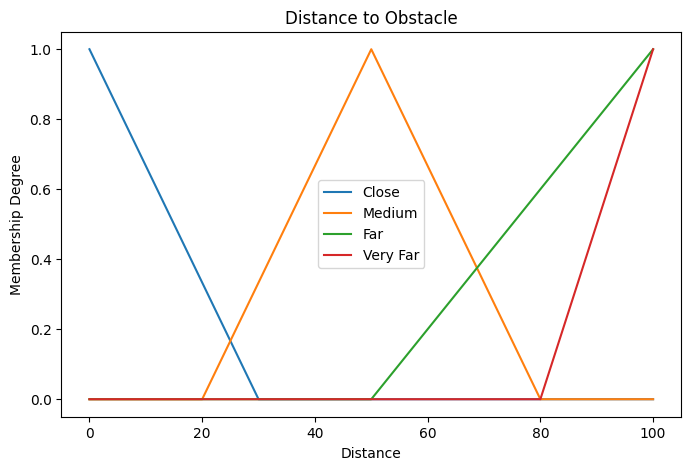

In [39]:
plt.figure(figsize=(8, 5))

plt.plot(distance_to_obstacle.universe, fuzz.trimf(distance_to_obstacle.universe, [0, 0, 30]), label='Close')
plt.plot(distance_to_obstacle.universe, fuzz.trimf(distance_to_obstacle.universe, [20, 50, 80]), label='Medium')
plt.plot(distance_to_obstacle.universe, fuzz.trimf(distance_to_obstacle.universe, [50, 100, 100]), label='Far')
plt.plot(distance_to_obstacle.universe, fuzz.trimf(distance_to_obstacle.universe, [80, 100, 100]), label='Very Far')

plt.title('Distance to Obstacle')
plt.xlabel('Distance')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

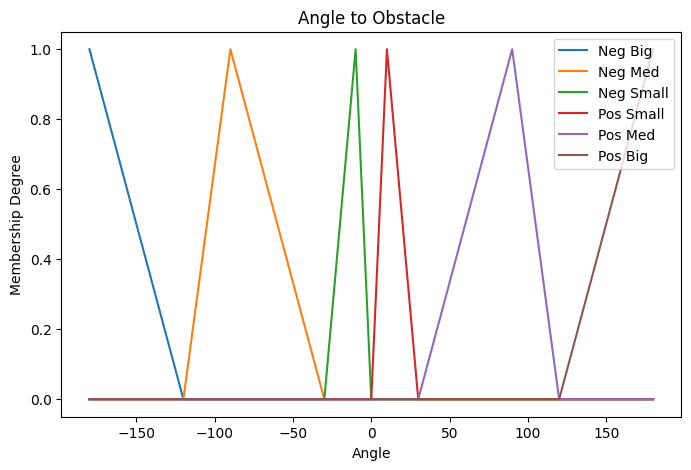

In [40]:
plt.figure(figsize=(8, 5))

plt.plot(angle_to_obstacle.universe, fuzz.trimf(angle_to_obstacle.universe, [-180, -180, -120]), label='Neg Big')
plt.plot(angle_to_obstacle.universe, fuzz.trimf(angle_to_obstacle.universe, [-120, -90, -30]), label='Neg Med')
plt.plot(angle_to_obstacle.universe, fuzz.trimf(angle_to_obstacle.universe, [-30, -10, 0]), label='Neg Small')
plt.plot(angle_to_obstacle.universe, fuzz.trimf(angle_to_obstacle.universe, [0, 10, 30]), label='Pos Small')
plt.plot(angle_to_obstacle.universe, fuzz.trimf(angle_to_obstacle.universe, [30, 90, 120]), label='Pos Med')
plt.plot(angle_to_obstacle.universe, fuzz.trimf(angle_to_obstacle.universe, [120, 180, 180]), label='Pos Big')

plt.title('Angle to Obstacle')
plt.xlabel('Angle')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

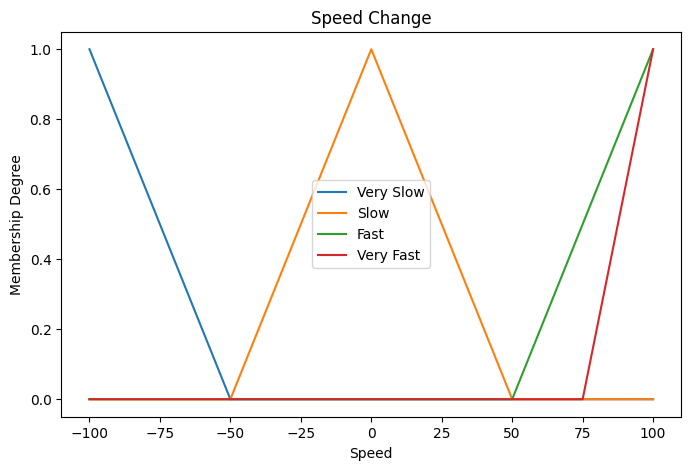

In [41]:
plt.figure(figsize=(8, 5))

plt.plot(speed_change.universe, speed_change['very_slow'].mf, label='Very Slow')
plt.plot(speed_change.universe, speed_change['slow'].mf, label='Slow')
plt.plot(speed_change.universe, speed_change['fast'].mf, label='Fast')
plt.plot(speed_change.universe, speed_change['very_fast'].mf, label='Very Fast')

plt.title('Speed Change')
plt.xlabel('Speed')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

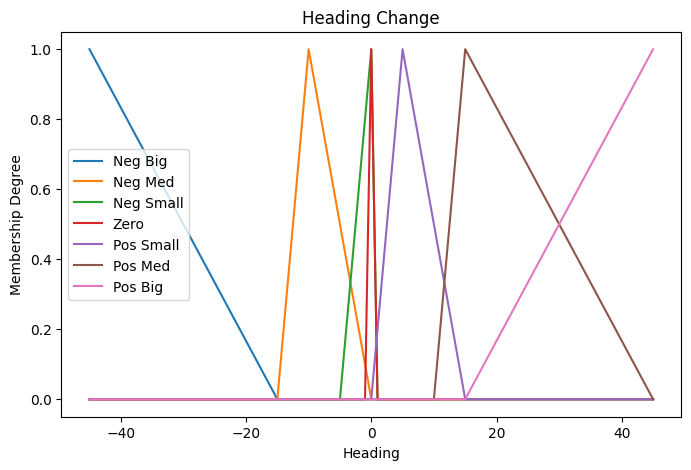

In [42]:
plt.figure(figsize=(8, 5))

plt.plot(heading_change.universe, heading_change['neg_big'].mf, label='Neg Big')
plt.plot(heading_change.universe, heading_change['neg_med'].mf, label='Neg Med')
plt.plot(heading_change.universe, heading_change['neg_small'].mf, label='Neg Small')
plt.plot(heading_change.universe, heading_change['zero'].mf, label='Zero')
plt.plot(heading_change.universe, heading_change['pos_small'].mf, label='Pos Small')
plt.plot(heading_change.universe, heading_change['pos_med'].mf, label='Pos Med')
plt.plot(heading_change.universe, heading_change['pos_big'].mf, label='Pos Big')

plt.title('Heading Change')
plt.xlabel('Heading')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()